In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(
    low=-90.000
    , high=90.000
    , size=1500
)
lngs = np.random.uniform(
    low=-180.000
    , high=180.000
    , size=1500
)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(
        coordinate[0]
        , coordinate[1]
    ).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
len(cities)

611

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | moose factory
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | maindargi
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | tual
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | acapulco
Processing Record 18 of Set 1 | havelock
Processing Record 19 of Set 1 | flin flon
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | punta 

Processing Record 33 of Set 4 | la ronge
Processing Record 34 of Set 4 | coquimbo
Processing Record 35 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 4 | vardo
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | suntar
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | santo antonio do ica
Processing Record 42 of Set 4 | villa maria
Processing Record 43 of Set 4 | listvyanskiy
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | vostok
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | vallenar
Processing Record 49 of Set 4 | is
City not found. Skipping...
Processing Record 50 of Set 4 | kavaratti
Processing Record 1 of Set 5 | tanout
Processing Record 2 of Set 5 | shablykino
Processing Record 3 of Set 5 | lesosibirsk
Processing Record 4 of Set 5 | vao
Processi

Processing Record 19 of Set 8 | nanortalik
Processing Record 20 of Set 8 | tura
Processing Record 21 of Set 8 | tevaitoa
Processing Record 22 of Set 8 | mikhaylovka
Processing Record 23 of Set 8 | presidencia roque saenz pena
Processing Record 24 of Set 8 | nanlong
Processing Record 25 of Set 8 | aswan
Processing Record 26 of Set 8 | oksfjord
Processing Record 27 of Set 8 | chenzhou
Processing Record 28 of Set 8 | hays
Processing Record 29 of Set 8 | liberty
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 8 | valparaiso
Processing Record 34 of Set 8 | sioux lookout
Processing Record 35 of Set 8 | mamallapuram
Processing Record 36 of Set 8 | khandyga
Processing Record 37 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 8 | taoudenni
Processing Record 39 of Set 8 | coahuayana
Processing Record 40 of

Processing Record 9 of Set 12 | phayakkhaphum phisai
Processing Record 10 of Set 12 | lagoa
Processing Record 11 of Set 12 | the valley
Processing Record 12 of Set 12 | gouyave
Processing Record 13 of Set 12 | ulaangom
Processing Record 14 of Set 12 | panalingaan
Processing Record 15 of Set 12 | saldanha
Processing Record 16 of Set 12 | severnyy
Processing Record 17 of Set 12 | mizdah
Processing Record 18 of Set 12 | belyy yar
Processing Record 19 of Set 12 | podgornoye
Processing Record 20 of Set 12 | betera
Processing Record 21 of Set 12 | darnah
Processing Record 22 of Set 12 | ostrovnoy
Processing Record 23 of Set 12 | fountain hills
Processing Record 24 of Set 12 | ozinki
Processing Record 25 of Set 12 | artyk
City not found. Skipping...
Processing Record 26 of Set 12 | sapa
Processing Record 27 of Set 12 | lompoc
Processing Record 28 of Set 12 | ayan
Processing Record 29 of Set 12 | sungaipenuh
Processing Record 30 of Set 12 | saint-joseph
Processing Record 31 of Set 12 | moerai


In [7]:
print(len(city_data))

555


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moose Factory,51.26,-80.61,68.00,72,1,4.70,CA,2020-06-19 02:26:01
1,Nikolskoye,59.70,30.79,63.00,88,0,2.82,RU,2020-06-19 02:26:01
2,Port Alfred,-33.59,26.89,57.99,67,0,9.35,ZA,2020-06-19 02:25:14
3,Rikitea,-23.12,-134.97,73.62,91,100,16.37,PF,2020-06-19 02:26:01
4,Maindargi,17.47,76.30,76.53,82,100,13.02,IN,2020-06-19 02:26:01
5,Souillac,-20.52,57.52,71.60,64,75,13.87,MU,2020-06-19 02:23:27
6,Port Elizabeth,-33.92,25.57,48.20,76,0,4.70,ZA,2020-06-19 02:22:35
7,Yellowknife,62.46,-114.35,68.00,34,20,12.75,CA,2020-06-19 02:23:20
8,Busselton,-33.65,115.33,57.00,86,80,5.12,AU,2020-06-19 02:24:50
9,Ribeira Grande,38.52,-28.70,64.35,90,43,8.95,PT,2020-06-19 02:24:51


In [10]:
new_column_order = [
    'City'
    , 'Country'
    , 'Date'
    , 'Lat'
    , 'Lng'
    , 'Max Temp'
    , 'Humidity'
    , 'Cloudiness'
    , 'Wind Speed'
]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moose Factory,CA,2020-06-19 02:26:01,51.26,-80.61,68.00,72,1,4.70
1,Nikolskoye,RU,2020-06-19 02:26:01,59.70,30.79,63.00,88,0,2.82
2,Port Alfred,ZA,2020-06-19 02:25:14,-33.59,26.89,57.99,67,0,9.35
3,Rikitea,PF,2020-06-19 02:26:01,-23.12,-134.97,73.62,91,100,16.37
4,Maindargi,IN,2020-06-19 02:26:01,17.47,76.30,76.53,82,100,13.02
5,Souillac,MU,2020-06-19 02:23:27,-20.52,57.52,71.60,64,75,13.87
6,Port Elizabeth,ZA,2020-06-19 02:22:35,-33.92,25.57,48.20,76,0,4.70
7,Yellowknife,CA,2020-06-19 02:23:20,62.46,-114.35,68.00,34,20,12.75
8,Busselton,AU,2020-06-19 02:24:50,-33.65,115.33,57.00,86,80,5.12
9,Ribeira Grande,PT,2020-06-19 02:24:51,38.52,-28.70,64.35,90,43,8.95


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

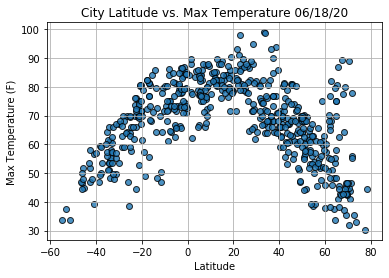

In [15]:
import matplotlib.pyplot as plt
import time

# Get today's date in seconds.
today = time.time()
today
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats
    , max_temps
    , edgecolor="black"
    , linewidths=1
    , marker="o"
    , alpha=0.8
    , label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

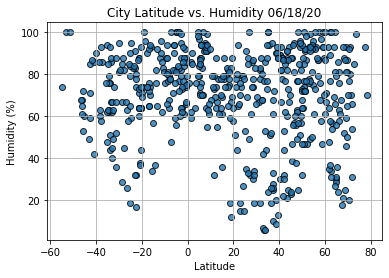

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

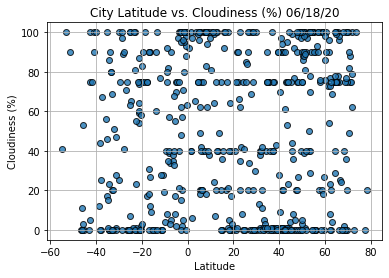

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()